In [1]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np


2.0.0-alpha0


In [2]:
width = 28
height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000, width*height).astype('float32')/255.0  # 28*28 정사각형 데이터를 1줄짜리 데이터로 바꾼다
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0  # 정규화하기 위해 255로 나눈다

In [3]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]


In [4]:
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)


In [13]:
model = Sequential()
model.add(Dense(units=10, input_dim=784, activation='elu'))
model.add(Dense(units=512, activation='softmax'))
model.add(Dense(units=126, activation = 'elu'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3) #조기종료 콜백함수 정의
hist = model.fit(x_train, y_train, 
                 epochs=50, 
                 batch_size=30, 
                 verbose=1, 
                 validation_data=(x_val, y_val),
                 callbacks = [early_stopping])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 59us/sample - loss: 0.0627 - accuracy: 0.9800 - val_loss: 0.2024 - val_accuracy: 0.9540
Epoch 2/50
50000/50000 [==============================] - 3s 58us/sample - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.2118 - val_accuracy: 0.9544
Epoch 3/50
50000/50000 [==============================] - 3s 58us/sample - loss: 0.0623 - accuracy: 0.9799 - val_loss: 0.2097 - val_accuracy: 0.9551
Epoch 4/50
50000/50000 [==============================] - 3s 60us/sample - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.2111 - val_accuracy: 0.9553


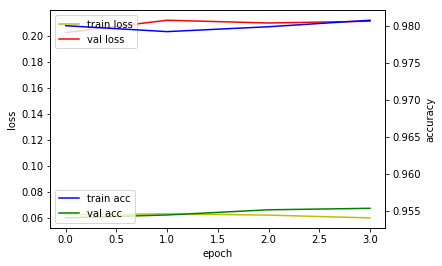

In [16]:
#모델 그려보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b' , label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
yhat
acc_ax.legend(loc='lower left')

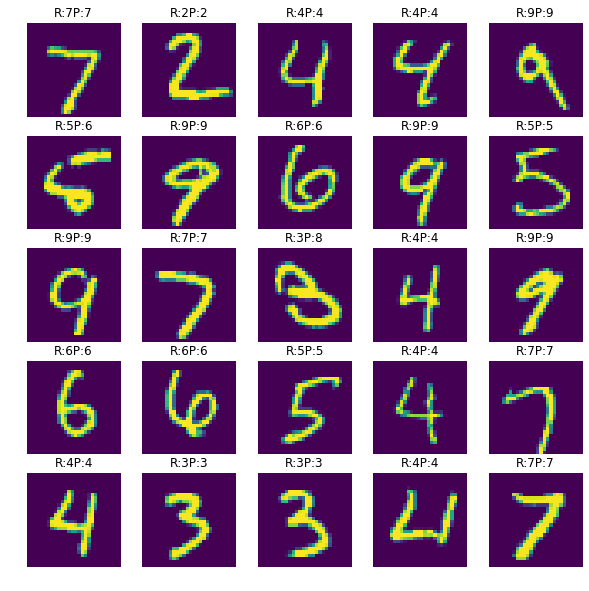

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
yhat_test = model.predict(x_test, batch_size=32)
%matplotlib inline
import matplotlib.pyplot as plt
plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10,10)
f, axarr = plt.subplots(plt_row, plt_col)
cnt = 0
i = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i] == np.argmax(yhat_test[i])):
        i+=1
        continue
    sub_plt = axarr[int(cnt/plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width,height))
    sub_plt_title='R:'+str(np.argmax(y_test[i]))+'P:'+str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    i+=1
    cnt+=1
plt.show()
print(y_test[1])